In [28]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.datasets import fetch_openml


import matplotlib.pyplot as plt
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from matplotlib import pyplot as plt
import numpy as np

device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

print('Current cuda device is', device)

batch_size = 50
learning_rate = 0.0001
epoch_num = 15

train_data = datasets.MNIST(root = '../data/mnist/',
                            train=True,
                            download=True,
                            transform=transforms.ToTensor())
test_data = datasets.MNIST(root = '../data/mnist/',
                            train=False,
                            download=True,
                            transform=transforms.ToTensor())
print('number of training data : ', len(train_data))
print('number of test data : ', len(test_data))


train = datasets.MNIST(root = '../data/mnist/',
                            train=True,
                            download=True,)

test = datasets.MNIST(root = '../data/mnist/',
                            train=False,
                            download=True)

x = train.data
y = train.targets

# train_data = train_data.reshape(-1, 28*28)
x = x.numpy()
y = y.numpy()
x = x.reshape(-1, 28*28)
x.shape, y.shape, type(x), type(y)

## normalize

x = x/255.0


# making data frame 
import pandas as pd

feat_cols = ['pixel'+str(i) for i in range(x.shape[1]) ]

df = pd.DataFrame(x,columns=feat_cols)
df['label'] = y
df['label'] = df['label'].apply(lambda i: str(i))
x,y = None, None
print('Size of the dataframe: {}'.format(df.shape))
df.head()

Current cuda device is cuda
number of training data :  60000
number of test data :  10000
Size of the dataframe: (60000, 785)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,label
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9


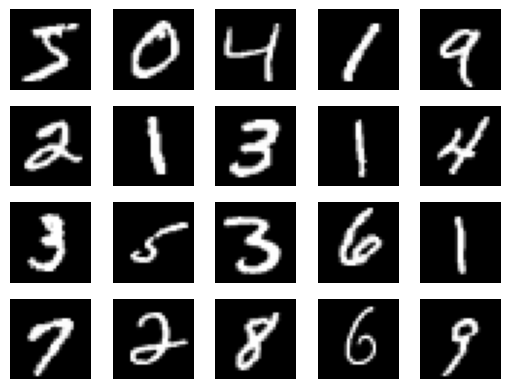

In [68]:
# show images 
for i in range(20):
    plt.subplot(4, 5, i+1)
    plt.imshow(train_data[i][0].reshape(28, 28), cmap='gray')
    plt.axis('off')

In [78]:
# PCA
df1 = df[:5000]
y_viz_train = df1['label']
X_viz_train = df1.drop('label', axis=1)
# X_viz_test = test
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_viz_train = scaler.fit_transform(X_viz_train)
# X_viz_test = scaler.fit_transform(X_viz_test)

pca = PCA(n_components=77)
pca_s = pca.fit_transform(X_viz_train)
# principalDf =pd.DataFrame(data = pca_s, columns = ['principal_axes_1',  'principal_axes_2', 'principal_axes_3','principal')
cols = []
for i in range(1,78):
    columns = 'principal_axes_'+str(i)
    cols.append(columns)
    
principalDf = pd.DataFrame(data= pca_s,columns=cols)
label = pd.DataFrame(list(df1['label']))


principalDf = pd.concat([principalDf,label],axis = 1,join='inner', ignore_index=True)
principalDf = principalDf.loc[:,~principalDf.columns.duplicated()]
principalDf.columns = cols + ['label']
principalDf.head() 

,principal_axes_1,principal_axes_2,principal_axes_3,principal_axes_4,principal_axes_5,principal_axes_6,principal_axes_7,principal_axes_8,principal_axes_9,principal_axes_10,...,principal_axes_69,principal_axes_70,principal_axes_71,principal_axes_72,principal_axes_73,principal_axes_74,principal_axes_75,principal_axes_76,principal_axes_77,label
0,-1.183818,-4.746649,-0.617645,-7.376369,-1.665832,1.530760,-0.622300,1.037408,0.723218,0.233477,...,-0.041122,0.063417,-1.343237,1.144448,0.745840,-0.079627,0.564604,0.854482,-0.047436,5
1,8.342006,-7.066931,-5.279512,-2.106282,0.566230,-5.133337,0.964161,2.296465,1.126452,-2.243337,...,0.499625,-0.550213,-0.562143,-0.901580,0.702474,0.467692,0.402517,0.688822,-0.971267,0
2,2.637481,10.662147,-3.538522,0.665407,3.104848,4.183637,18.067222,4.082325,0.438212,-0.153757,...,4.542738,-1.446493,-1.989803,3.070544,6.946330,-0.920310,-3.691847,0.487859,-2.131210,4
3,-7.175691,-3.628543,3.404710,-0.544335,6.394011,2.998399,1.451056,-3.352779,-0.687377,-4.199110,...,-0.487697,0.221674,0.234175,-0.120341,0.108556,-0.345992,0.993203,-0.255560,0.259043,1
4,-4.973147,4.969821,-4.829376,0.423218,-1.591192,-0.565813,-1.293679,-3.575442,-1.265236,1.475968,...,1.082525,0.047067,1.229600,-2.148083,-2.201913,-1.680746,0.135236,-0.408455,-1.071093,9


Eigen Vectors:
[[ 1.89883277e-18 -2.44217339e-19 -3.88129225e-20 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 3.17165587e-17 -1.37548142e-18  4.45100521e-19 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [-1.91968432e-16  1.69952321e-17  4.05537250e-19 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 ...
 [-1.62917767e-17  4.90937834e-18 -1.81560683e-17 ...  0.00000000e+00
   0.00000000e+00  0.00000000e+00]
 [-8.92011247e-18  2.89853886e-17  2.22765894e-17 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]
 [ 9.95283457e-18  2.14989932e-17 -2.72388819e-18 ... -0.00000000e+00
  -0.00000000e+00 -0.00000000e+00]]
(77, 784)
Eigen Values:
[40.58880389 30.08784143 27.03251484 21.04373964 18.54624452 15.67028033
 14.33859527 12.81594433 11.22718202 10.46809616  9.88930063  8.53143624
  8.1017558   8.04119195  7.82975361  7.33599629  7.19609465  6.97423348
  6.6221365   6.42142463  6.12649428  5.99993288  5.96432066  5.75587188
  5.47740899  5.29433352  5.11699

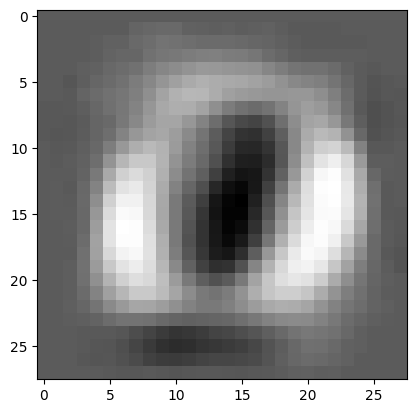

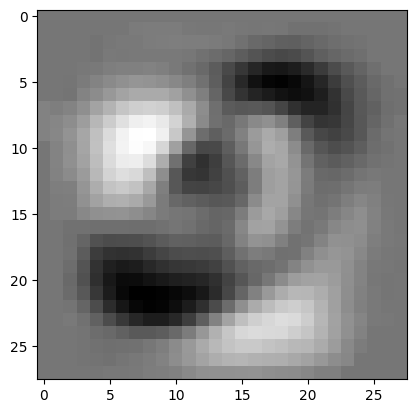

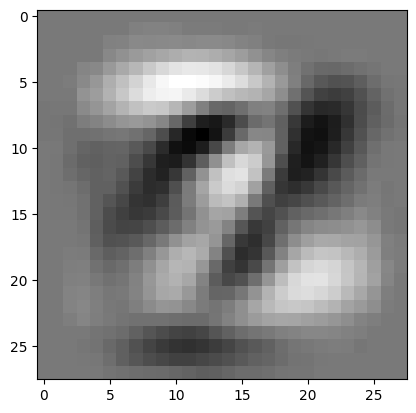

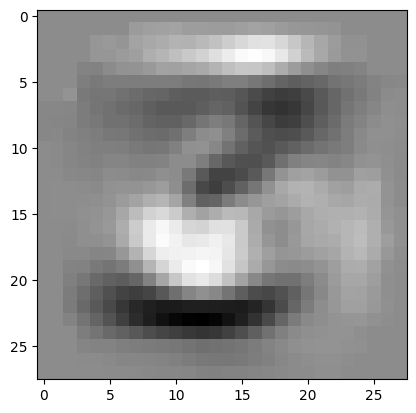

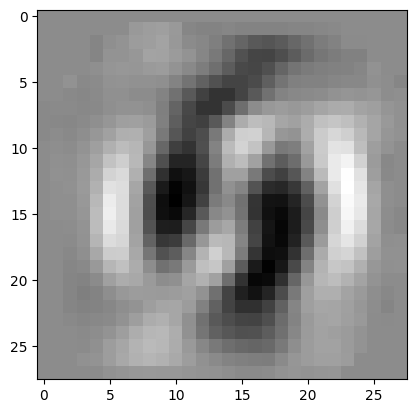

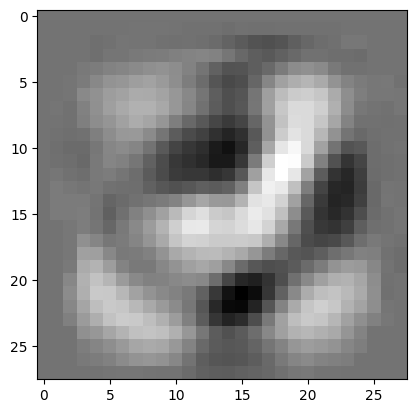

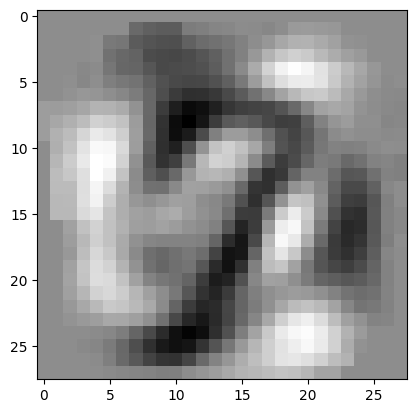

In [80]:
eigen_vectors = pca.components_
eigen_values = pca.explained_variance_

print("Eigen Vectors:")
print(eigen_vectors)
print(eigen_vectors.shape)
print("Eigen Values:")
print(eigen_values)

for i in range(7):
    egv1 = eigen_vectors[i].reshape(28,28)
    plt.imshow(egv1,cmap='gray')
    plt.show()

In [45]:
new_images = []
for i in range(20):
    nimg = principalDf['principal_axes_1'][i]*eigen_vectors[0] + principalDf['principal_axes_2'][i]*eigen_vectors[1] + principalDf['principal_axes_3'][i]*eigen_vectors[2]
    new_images.append(nimg)
new_images = np.array(new_images)
new_images.shape




(20, 784)

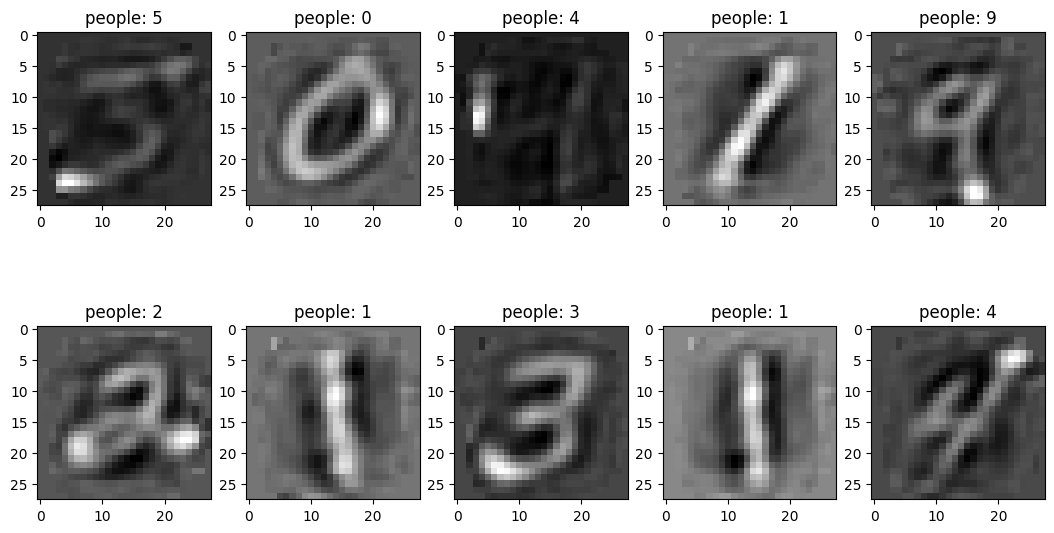

In [82]:
new_images = []
for i in range(20):
    new_image = np.zeros((28*28))
    for j in range(77):
        new_image += eigen_vectors[j]*principalDf.iloc[i,j]
    new_images.append(new_image)

fig = plt.figure(figsize=(13,7))
for i in range(10):
    ax = fig.add_subplot(2,5,i+1, title='people: ' + str(df.label[i]) )
    ax.imshow(new_images[i].reshape(28,28),cmap='gray')
    



In [31]:

egv1 = eigen_vectors[0]#.reshape(28,28)
egv2 = eigen_vectors[1]#.reshape(28,28)
egv3 = eigen_vectors[2]#.reshape(28,28)

a= egv1.T@egv2
b = egv1.T@egv3
c = egv2.T@egv3
a,b,c

egv1.T@egv1 # normalized

0.9999999999999998

In [42]:
egv1.shape
X_viz_train[0].shape

(784,)

In [ ]:
new_image = egv1*egv1.T@X_viz_train[0]

In [32]:
import numpy as np

from matplotlib import pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.colors import ListedColormap

# generate data
x = principalDf['principal_axes_1'].values
y = principalDf['principal_axes_2'].values
z = principalDf['principal_axes_3'].values
# change the label to int
principalDf['label'] = principalDf['label'].astype(int)

label = principalDf['label'].values

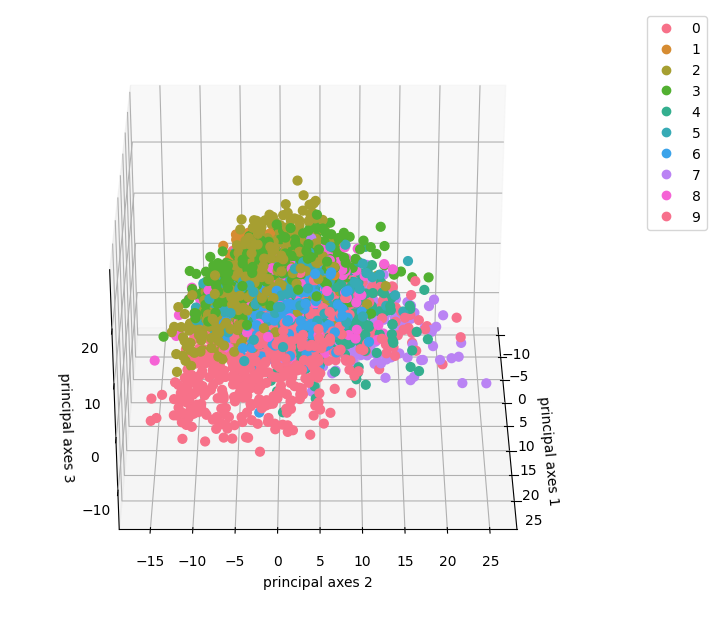

In [33]:
import re, seaborn as sns
# axes instance
fig = plt.figure(figsize=(6,6))
ax = Axes3D(fig, auto_add_to_figure=False)
fig.add_axes(ax)

# get colormap from seaborn
cmap = ListedColormap(sns.color_palette("husl", 256).as_hex())

# plot
sc = ax.scatter(x, y, z, s=40, c=label, marker='o', cmap=cmap, alpha=1)
ax.set_xlabel('principal axes 1')
ax.set_ylabel('principal axes 2')
ax.set_zlabel('principal axes 3')

# legend
plt.legend(*sc.legend_elements(), bbox_to_anchor=(1.05, 1), loc=2)

# save
plt.savefig("scatter_hue", bbox_inches='tight')

from matplotlib import animation

def rotate(angle):
    ax.view_init(azim=angle)

angle = 3
ani = animation.FuncAnimation(fig, rotate, frames=np.arange(0, 360, angle), interval=10)
ani.save('pca_3point.gif', writer=animation.PillowWriter(fps=60))

In [34]:
# !pip install seaborn matplotlib plotly

<Figure size 1300x1000 with 0 Axes>

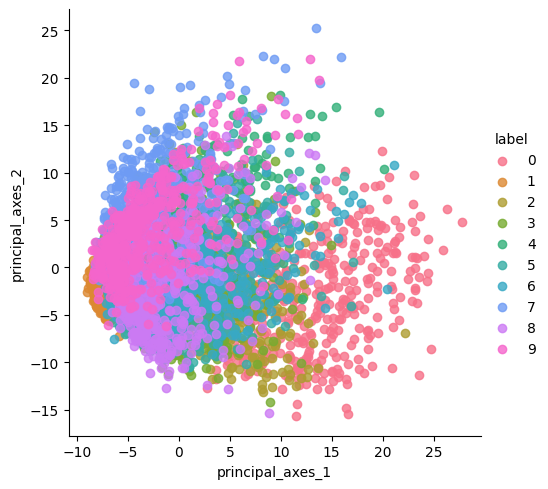

<Figure size 1300x1000 with 0 Axes>

In [35]:
import seaborn as sns
flatui = ["#9b59b6", "#3498db", "orange"]
sns.set_palette(flatui)

# label showing

sns.lmplot( x="principal_axes_1", y="principal_axes_2", data=principalDf, fit_reg=False, hue='label', legend=True,)

plt.figure(figsize=(13,10))

In [52]:
df.label[0]

'5'

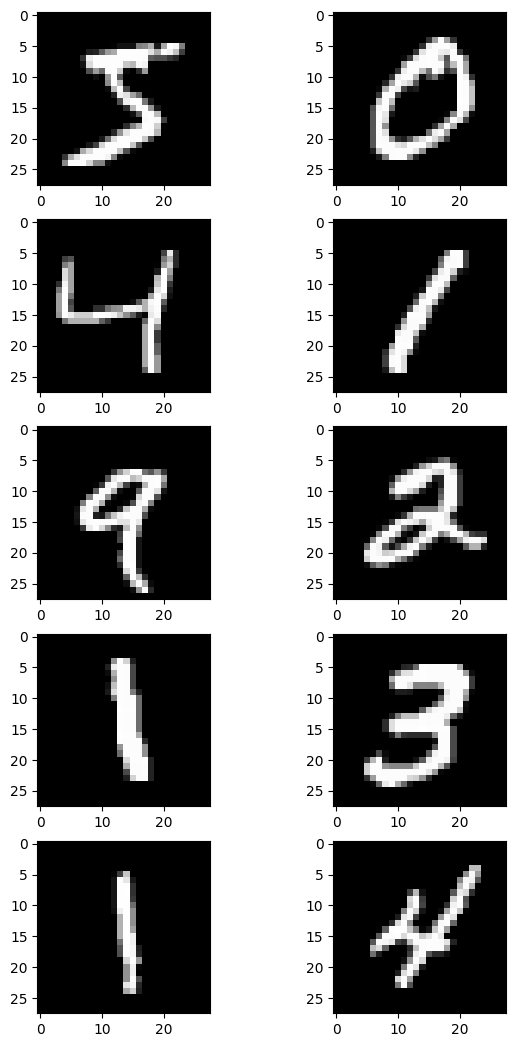

In [62]:
fig = plt.figure(figsize=(7,13))
for i in range(10):
    plt.subplot(5,2,i+1)
    plt.imshow(train_data[i][0].reshape(28,28), cmap='gray')
    
fig = plt.figure(figsize=(7,13))
for i in range(10):
    ax = fig.add_subplot(5,2,i+1, title='Digit: ' + str(df.label[i]) )
    ax.imshow(new_images[i].reshape(28,28),cmap='gray')
    

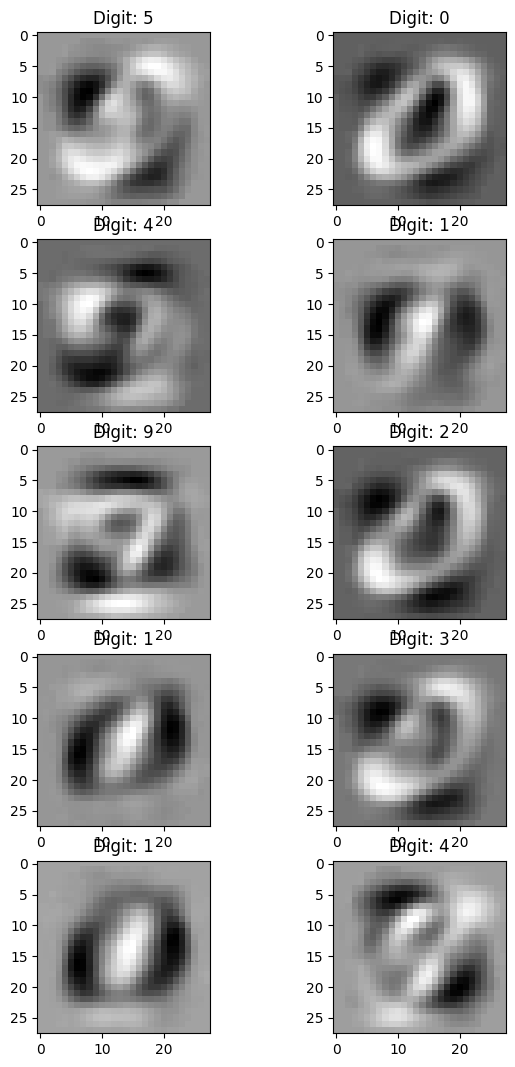

In [64]:
fig = plt.figure(figsize=(7,13))
for i in range(10):
    ax = fig.add_subplot(5,2,i+1, title='Digit: ' + str(df.label[i]) )
    ax.imshow(new_images[i].reshape(28,28),cmap='gray')
    

<Figure size 640x480 with 0 Axes>

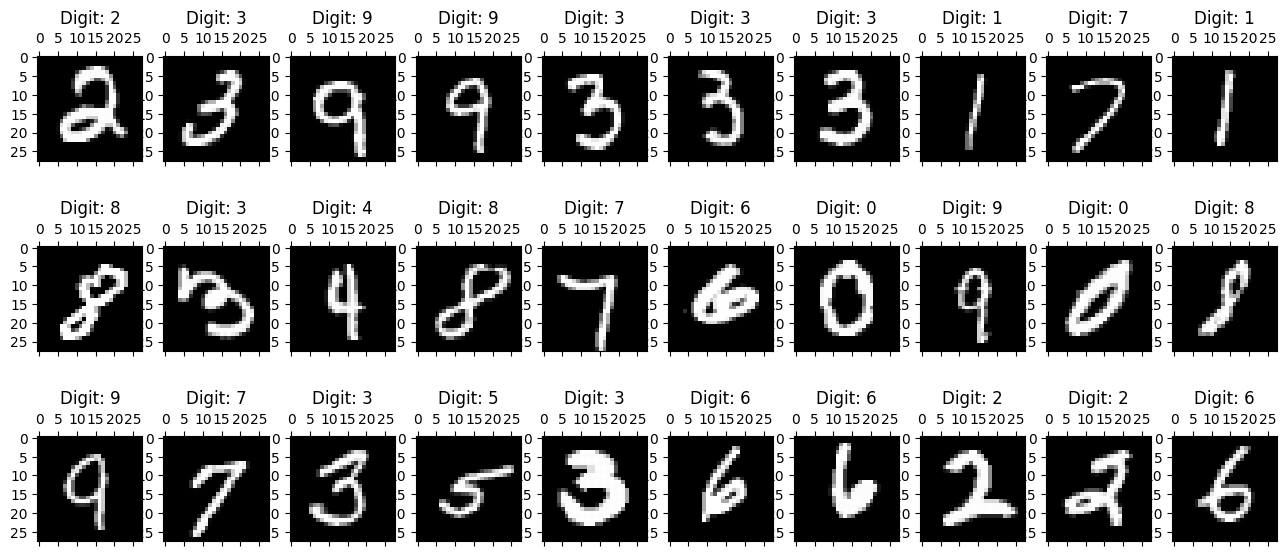

In [36]:
rndperm = np.random.permutation(df.shape[0])

import matplotlib.pyplot as plt
# plot the graph
plt.gray()
fig = plt.figure( figsize=(16,7) )
for i in range(0,30):
    ax = fig.add_subplot(3,10,i+1, title='Digit: ' + str(df.loc[rndperm[i],'label']) )
    ax.matshow(df.loc[rndperm[i],feat_cols].values.reshape((28,28)).astype(float))
plt.show()